# 고양이 수염 스티커 만들기
-------------

* 고양이 수염 스티커를 만들어 콧수염 만들어보기

## 이미지 처리 관련 패키지들

```python
$ pip install opencv-python    
$ pip install cmake    
$ pip install dlib`
```

## 이미지 처리

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
print("🌫🛸")

🌫🛸


### 이미지 크기변경

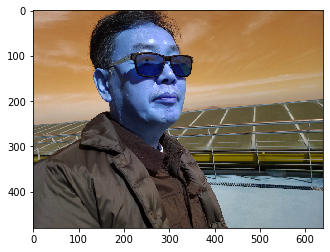

In [294]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 480))    # 480x640의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

### 이미지 색변경

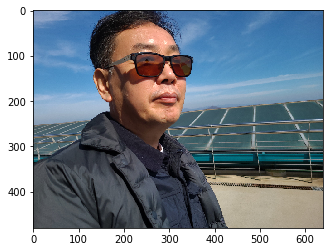

In [295]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

## 얼굴 검출

In [296]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
print("🌫🛸")

🌫🛸


In [297]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print("🌫🛸")

🌫🛸


rectangles[[(180, 57) (366, 242)]]


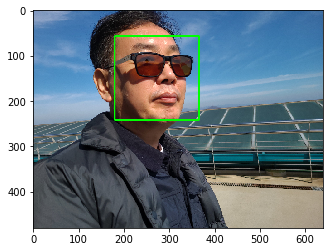

In [298]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 얼굴 랜드마크

Dlib의 제공되는 모델을 사용하자. 먼저 공개되어 있는 weight file을 다운로드 받습니다. 위치는 root 디렉토리의 models 디렉토리이다. 해당 모델파일은 bz2 압축파일 형태로 제공되어 압축을 풀어준 후 사용한다.

```python
$ wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2      
$ mv shape_predictor_68_face_landmarks.dat.bz2 ~/aiffel/camera_sticker/models     
$ cd ~/aiffel/camera_sticker && bzip2 -d ./models/shape_predictor_68_face_landmarks.dat.bz2_
```

In [299]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [300]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


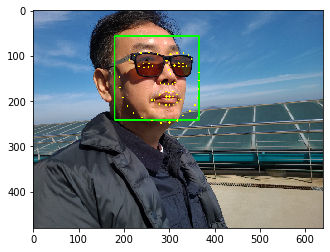

In [301]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 스티커 적용하기

In [302]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(303, 141)
(x,y) : (303,48)
(w,h) : (187,187)


In [303]:
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(187, 187, 3)


In [304]:
refined_x = x - w // 2 # left
refined_y = y #- h #// 2     # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (210,48)


#### y를 -에서 0으로 바꾸는 작업은 뺐다.

```python
$ img_sticker = img_sticker[-refined_y:]
$ print (img_sticker.shape)
```

```python
$ refined_y = 337
$ print ('(x,y) : (%d,%d)'%(refined_x, refined_y))
```

In [305]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)
#img_sticker,sticker_area이 둘의 순서를 바꿔줬다. img_sticker가 아니면 sticker_area를 넣어준다.

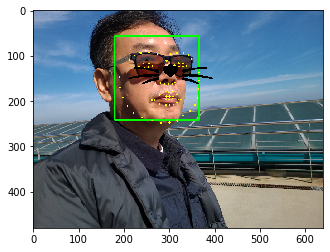

In [306]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

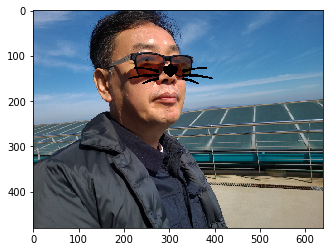

In [307]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## 스티커 붙이기를 회고하며..

좀 어이없게 성공했다.    

처음에는 다른 사진을 올리면 불가능하길래 성공기념으로 다시 run 안해보려 했지만 그래도 사진이 다르다고 안돌아가면 사용 불가능한 기능이니 다른 사진으로 시도해봤는데 잘된다..       

일단 바꾼 부분을 적어보자면 (x, y) 좌표 조정하는 부분을 고쳤고, y를 0으로 옮기는 코드를 뺐고, 스티커의 적용 코드에 y 좌표를 추가했다.      
그런데 (x, y) 좌표를 조정하고 스티커 조정코드에 예시 노드처럼 y를 빼면 안돌아간다;; 왜그러는 건지 도저히 모르겠다.